# Aula 12
**Objetivo: ao fim desta aula, ao aluno será capaz de avaliar se distribuições de Poisson são adequadas para modelar acontecimentos discretos ao longo do tempo**

## Texto introdutório

Até o momento, sabemos usar uma distribuição binomial. Numa distribuição binomial, jogamos $n$ vezes uma moeda enviesada (com probabilidade $p$ de "dar cara"), e contamos o número total de ensaios que "deram cara". Temos a expectativa (esperança) de encontrar $\lambda=np$ "cara"s.

Vamos pensar agora que estamos jogando uma moeda a cada pequeno intervalo de tempo - por exemplo, uma moeda por segundo - ao longo de um intervalo maior - por exemplo, um minuto. Nesse caso, temos uma binomial com $n=60$. Porém, em alguns casos, o intervalo de tempo entre cada "jogada de moeda" é infinitesimalmente pequeno, e, por isso, $n \rightarrow \infty$. Porém, nossa probabilidade $p$ de "dar cara" também é muito pequena, e por isso $\lambda=np$ é um valor finito (e possivelmente pequeno).

Nesse caso, temos uma nova distribuição, que é obtida quando calculamos:
$$
P(X=k) = \lim_{n \rightarrow \infty} \frac{n!}{k!(n-k)!} p^k (1-p)^{(n-k)}
$$

Após vários passos algébricos (que podem ser acompanhados [aqui](https://medium.com/@andrew.chamberlain/deriving-the-poisson-distribution-from-the-binomial-distribution-840cc1668239)), chegamos a:

$$
P(X=k) = \frac{e^{-\lambda}\lambda^k}{k!}.
$$

Essa distribuição é chamada de distribuição de Poisson, e escrevemos: $X$~$Poisson(\lambda)$. Essa distribuição nos dá a **probabilidade de encontrar um número $k$ de eventos no intervalo para o qual determinamos a distribuição**. Nessa distribuição, $\lambda$ é o número médio de eventos que ocorrem no intervalo considerado. Note que, embora tenhamos pensado na distribuição Poisson para um intervalo contínuo, o mesmo raciocínio poderia ser aplicado para espaços físicos.

Para que um experimento possa ser modelado por uma distribuição de Poisson, ele precisa ter as seguintes propriedades:

- Probabilidade de uma ocorrência é a mesma para dois intervalos quaisquer de igual tamanho;
- A ocorrência ou não num dado intervalo é independente da ocorrência ou não em outro intervalo.

<div id="esperanca-variancia"></div>

### Esperança e Variância

Se $X$~$Poisson(\lambda)$, o valor esperado $E(X)$ e a variância $Var(X)$ são dados por:

$\qquad\qquad E(X) = \lambda$

$\qquad\qquad Var(X) = \lambda$

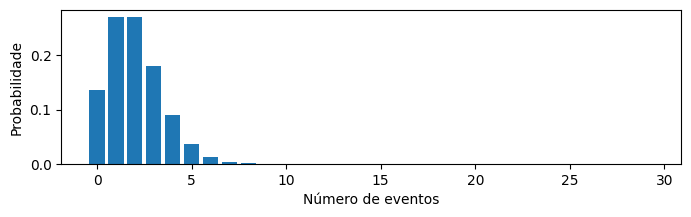

In [5]:
# Como é a "cara" de uma distribuição Poisson?

import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(8,2))
plt.bar(range(30), stats.poisson.pmf(range(30), 2))
plt.xlabel('Número de eventos')
plt.ylabel('Probabilidade')
plt.show()

# Exercício 1
*Objetivo: usar uma distribuição de Poisson para julgar probabilidades*

Em uma partida de futebol, acontecem gols. Não pode haver dois gols ao mesmo tempo. Os gols acontecem a qualquer momento. Podemos quebrar o tempo da partida em intervalos bem pequenos e assumir que, em cada um deles, há uma probabilidade $p$ de haver gol - é como se jogássemos uma "moeda invisível" que, se der cara, sai um gol. Por isso, a quantidade de gols por partida em uma partida de futebol pode ser modelada por uma distribuição de Poisson.

No nosso conjunto de dados do Corinthians, temos uma coluna sobre o número de gols (total) por partida. Como o futebol mudou bastante desde sua origem (especialmente em relação a táticas e preparo dos jogadores) vamos usar apenas os jogos de 2010 em diante, de forma que nossos dados refletem apenas jogos mais modernos.

(a) O único parâmetro da distribuição Poisson ($\lambda$) é a esperança do número de gols em uma partida. Estime esse parâmetro à partir dos dados que você tem.

(b) Usando *os dados*, calcule a probabilidade de uma partida escolhida aleatoriamente ter zero gols.

(c) Usando *o modelo*, calcule a probabilidade de uma partida ter zero gols.

In [14]:
# Resolva seu exercício aqui
import pandas as pd
import scipy.stats as st
df = pd.read_csv('dados/corinthians/jogos_do_corinthians.csv')
df = df[ df['ANO']>=2010 ]


# Exercício 2
*Objetivo: aplicar a distribuição Poisson junto da Binomial para avaliar uma probabilidade frente a dados*

Construímos agora um modelo que permite prever a probabilidade $p_0$ de termos um jogo do Corinthians com zero gol. Um "jogo não ter nenhum gol" pode ser entendido como equivalente a jogar uma moeda enviesada que, se der cara, o jogo empata em zero a zero. Então, o conjunto de jogos que empataram zero a zero deve seguir uma distribuição binomial com parâmetro $p=p_0$.

Em nossos dados, temos um número $k$ de jogos que, de fato, foram empate, e um número $n$ total de jogos. A probabilidade $k/n$ é um pouco diferente de $p_0$, como vimos acima.

(a) Se $p_0$ é, de fato, a probabilidade de haver um empate zero a zero, qual é a probabilidade de encontrarmos uma observação tão ou mais extrema que aquela dada por $k$ e $n$ (dica: reveja a aula anterior, exercícios 4 e 5)?

(b) Essa probabilidade é suficientemente baixa para rejeitarmos a hipótese de que a probabilidade de um empate zero a zero é $p_0$?

In [11]:
import scipy.stats as st
import pandas as pd
# Lembre-se de: st.binom.cdf

# Exercício 3
*Objetivo: usar a função ppf e comparar com percentis medidos*

A função `ppf(x)` do scipy retorna o valor abaixo do qual está concentrada uma probabilidade `x`. Isso é bastante semelhante a um percentil. Por exemplo, a chamada:

In [12]:
import scipy.stats as st
st.binom.ppf(0.9, 20, 0.5)

13.0

significa que há uma probabilidade de $0.9$ de encontrarmos 13 ou menos caras em 20 jogadas de uma moeda honesta.

Semelhantemente, o percentil $x$ nos diz o valor abaixo do qual está $x\%$ de nossa amostra.

Usando os jogos do Corinthians:

(a) Pelo modelo teórico, qual é a quantidade de gols máxima que abarca 95% dos jogos?

(b) Qual é o percentil 95 dos dados?

In [16]:
gmax_teorico = st.poisson.ppf(0.95, L)
gmax_real = df['GOLS'].quantile(0.95)

print(gmax_teorico, gmax_real)

5.0 5.0


# Exercício 4
*Objetivo: interpretar qq-plots para observar a semelhança entre dados medidos e modelos*

Uma maneira de verificar se dados seguem, de fato, alguma distribuição é observando um plot dos percentis dos dados (`ppf`) contra os quantis dos dados. Se eles formarem uma reta, provavelmente os dados podem ser razoavelmente bem modelados pela distribuição. Esse gráfico se chama QQ-plot (quantile-quantile plot). Veja dois exemplos:

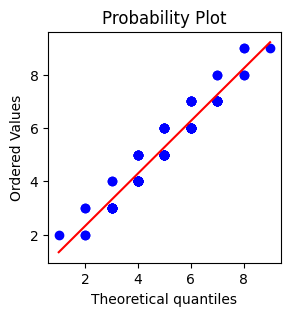

0.9834710743801652 0.36264462809917397 0.9596561993040842


In [67]:
# Exemplo 1: usei uma distribuição binomial para gerar exemplos,
# e a própria distribuição como referência:
import scipy.stats as st
import matplotlib.pyplot as plt

dados = st.binom.rvs(n=10, p=0.5, size=100)
plt.figure(figsize=(3,3))
(osm, osr), (slope, intercept, r) = st.probplot(dados, dist=st.binom(n=10,p=0.5), plot=plt)
plt.show()

# Os parâmetros slope, intercept e r se referem à reta que está sendo ajustada aos dados:
# * slope é a inclinação
# * intercept é o eixo y quando x=0
# * r é a correlação entre as duas variáveis (teórica e medida)
# * a reta deveria ser y=intercept + slope*x, com intercept=0 e slope=1
print(slope, intercept, r)


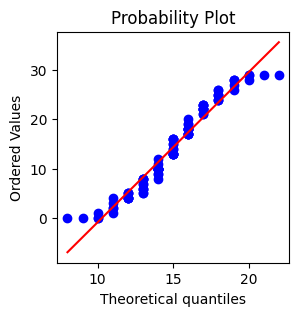

3.035135135135136 -31.16702702702704 0.9770418337335338


In [69]:
# Exemplo 2: usei uma distribuição binomial para gerar exemplos,
# e uma outra distribuição como referência:
import scipy.stats as st
import matplotlib.pyplot as plt

dados = st.randint.rvs(low=0, high=30, size=100)
plt.figure(figsize=(3,3))
(osm, osr), (slope, intercept, r) = st.probplot(dados, dist=st.binom(n=30,p=0.5), plot=plt)
plt.show()
print(slope, intercept, r)

Observando os exemplos, como podemos observar evidências de que os dados correspondem à distribuição usada no QQ-plot...

(a) Em relação ao *slope*?

(b) Em relação ao *intercept*?

(c) Em relação ao *r*?

(d) Em relação ao formato do gráfico?

# Exercício 5
*Objetivo: usar o QQ-plot para analisar se uma distribuição corresponde a dados teóricos*

Usando o QQ-plot, verifique se a distribuição Poisson que você calculou nos exercícios anteriores é adequada para modelar a quantidade de gols por partida em jogos do Corinthians.

In [ ]:
# Resolva seu exercício aqui.

# Exercício 6
*Objetivo: diferenciar uma distribuição Binomial de uma distribuição Poisson*

Nos casos abaixos, discuta se você deve usar uma distribuição Binomial ou uma distribuição Poisson, quais seriam os parâmetros (número de ensaios, probabilidade ou $\lambda$) da distribuição e use a distribuição para responder à pergunta.

1. Um restaurante recebe em média 15 clientes durante o horário do almoço. Qual é a probabilidade dele receber mais de 20 clientes em um dia específico?
2. Sabemos que um cliente do restaurante tem 30% de chance de pedir salada. Se tivermos 20 clientes, qual é a probabilidade de o restaurante servir mais de 6 saladas na hora do almoço.
3. Um restaurante recebe em média 30 clientes durante o horário do almoço. Cada cliente tem 25% de chance de pedir salada. Qual é a probabilidade de o restaurante servir mais de 10 saladas durante o almoço?
4. Um trecho de rodovia tem, em média, 2 buracos por km. Qual é a probabilidade de encontrarmos mais de 50 buracos ao longo de um trecho de 10km?
5. Uma loja recebe uma média de 10 clientes por hora. Qual é a probabilidade de aparecerem menos de 30 clientes ao longo de todo o horário comercial (8h seguidas)?


In [58]:
# Resolva seu exercício aqui